# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combine_df = pd.merge(mouse_metadata ,study_results)

# Display the data table for preview
mouse_study_combine_df = mouse_study_combine_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']]
mouse_study_combine_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [12]:
# Checking the number of mice.
mouse_count = len(mouse_study_combine_df['Mouse ID'].value_counts())
mouse_count

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = mouse_study_combine_df.loc[mouse_study_combine_df.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique
mouse_duplicate

<bound method Series.unique of 909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object>

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id_duplicate = mouse_study_combine_df.loc[mouse_study_combine_df['Mouse ID']== 'g989']
mouse_id_duplicate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_combine_df[mouse_study_combine_df['Mouse ID'].isin(mouse_id_duplicate)== False]
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [21]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_mouse_df['Mouse ID'].value_counts())
clean_mouse_count

249

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = clean_mouse_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_volume = grouped_data['Tumor Volume (mm3)'].var()
std_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_summary_table = pd.DataFrame({
    "Mean Tumor Volume":mean_volume,
    "Median Tumor Volume":median_volume,
    "Tumor Volume Variance":variance_volume,
    "Tumor Volume Std.":std_volume,
    "Tumor Volume Sem":sem_volume,
})

drug_summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.,Tumor Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_aggregation = clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

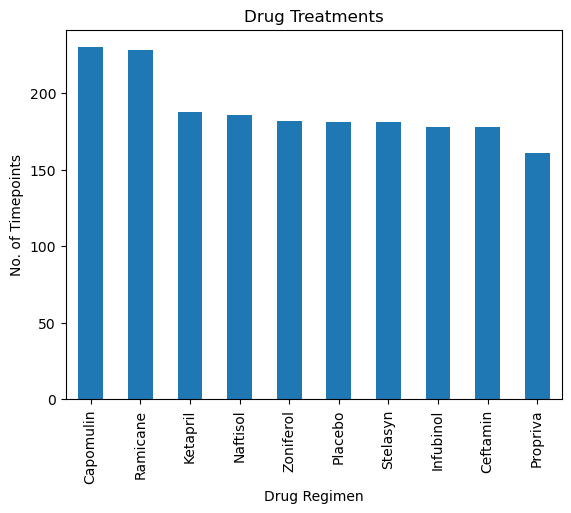

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_mice = clean_mouse_df['Drug Regimen'].value_counts()
number_mice.plot(xlabel= 'Drug Regimen', ylabel= 'No. of Timepoints', kind = "bar", title="Drug Treatments")
plt.show()


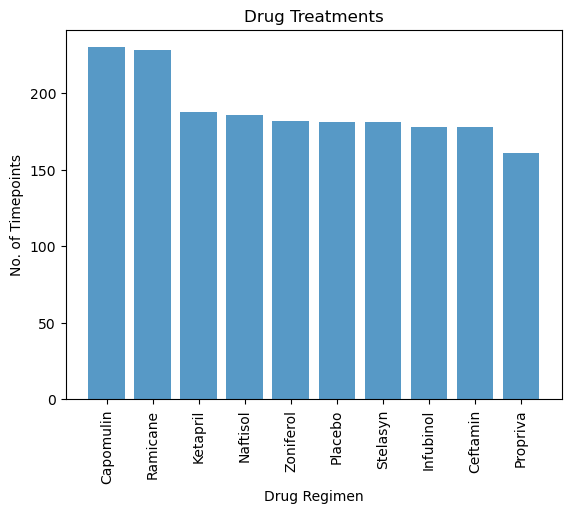

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = number_mice.index.values
y_axis = number_mice.values
plt.bar(x_axis, y_axis, alpha=0.75)
plt.title("Drug Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Timepoints")
plt.xticks(rotation='vertical')
plt.show()

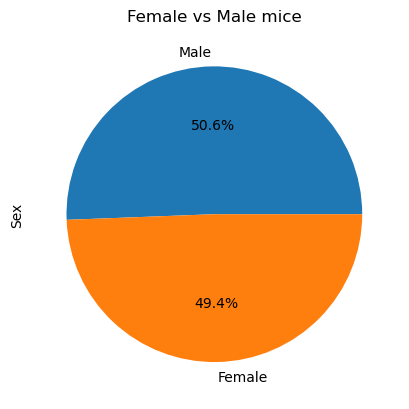

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = clean_mouse_df['Sex'].value_counts()
gender_count.plot(kind="pie", title = "Female vs Male mice", autopct = '%1.1f%%', ylabel = 'Sex')
plt.show()


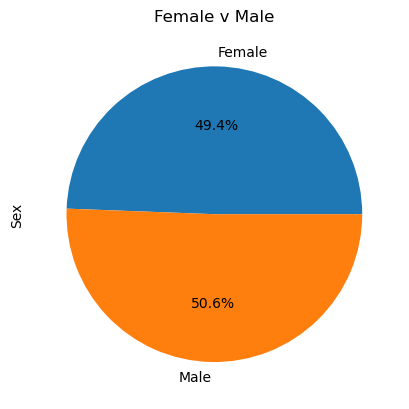

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.4, 50.6]
plt.pie(sizes, labels=labels,autopct="%1.1f%%")
plt.title("Female v Male")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_mouse_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(mouse_study_combine_df, last_timepoints, on=['Mouse ID', 'Timepoint'])

# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
235,x822,Ceftamin,61.386660
237,y163,Infubinol,67.685569
241,y769,Ceftamin,68.594745
242,y865,Ceftamin,64.729837


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
for treatment in treatments:
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volumes. quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
    
print(f"The lower quartile of each drug treatment is: {lowerq}")
print(f"The upper quartile of each drug treatment is: {upperq}")
print(f"The interquartile of each drug treatment is: {iqr}")
 
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")


The lower quartile of each drug treatment is: 48.72207785
The upper quartile of each drug treatment is: 64.29983003
The interquartile of each drug treatment is: 15.577752179999997
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers


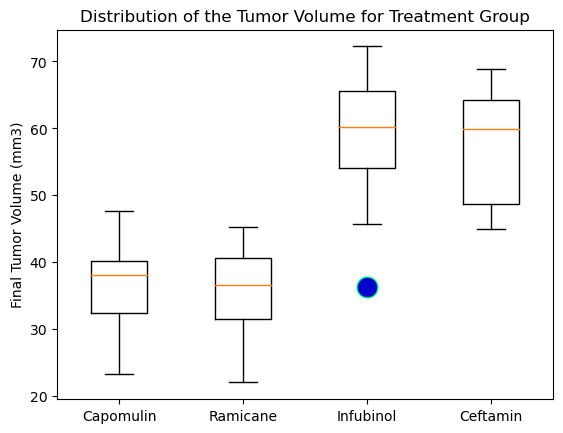

In [66]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
figl, ax = plt.subplots()
marker = dict(marker='o', markeredgecolor='springgreen', markerfacecolor='mediumblue',markersize=15)
ax.boxplot(tumor_volume_data, flierprops= marker)
ax.set_xticklabels(treatments)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of the Tumor Volume for Treatment Group')
plt.show()

## Line and Scatter Plots

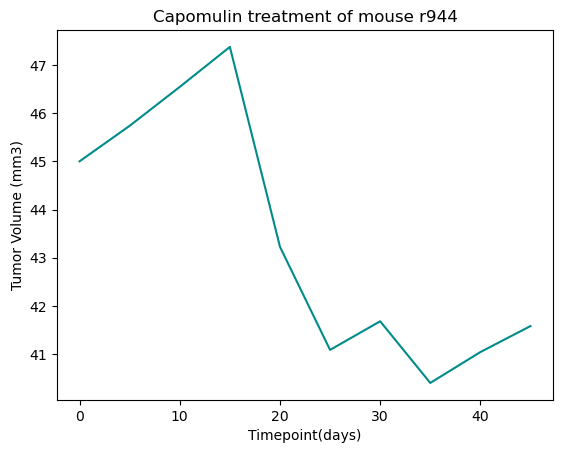

In [58]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treatment_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin',:]
single_mouse_df = capomulin_treatment_df.loc[capomulin_treatment_df['Mouse ID'] == 'r944']
single_mouse_df
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'], color='darkcyan')
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse r944")
plt.show()

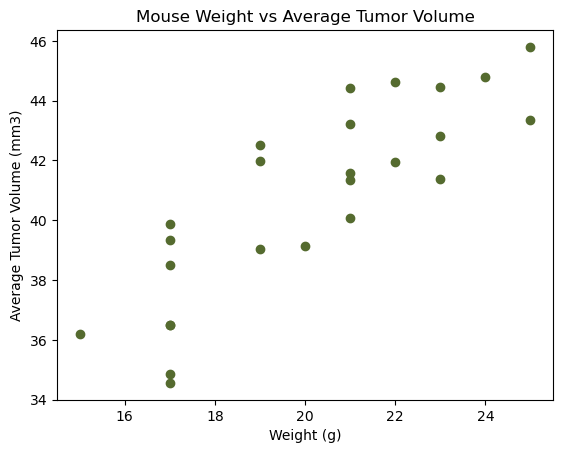

In [68]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_tumor_average = capomulin_treatment_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
cap_mouse_weight = capomulin_treatment_df.groupby(['Mouse ID'])['Weight (g)'].first()
plt.scatter(cap_mouse_weight,cap_tumor_average, color='darkolivegreen')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


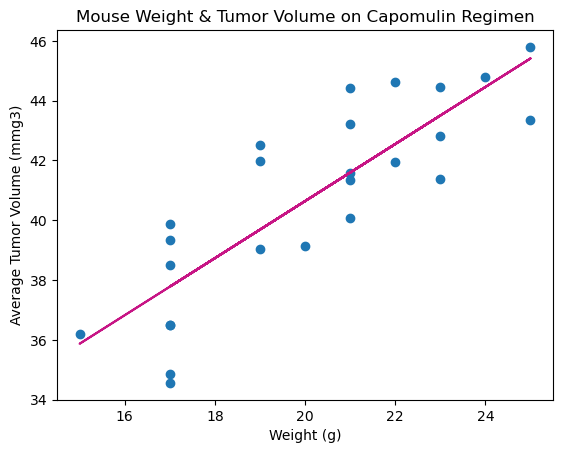

In [72]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(cap_mouse_weight,cap_tumor_average)[0]

slope, intercept, r_value, p_value, std_err = st.linregress(cap_mouse_weight,cap_tumor_average)
plt.scatter(cap_mouse_weight,cap_tumor_average)
plt.plot(cap_mouse_weight, intercept + slope * cap_mouse_weight, color='mediumvioletred')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mmg3)")
plt.title("Mouse Weight & Tumor Volume on Capomulin Regimen")
print(f"The correlation between mouse weight and the average tumor volume is  {correlation:.2f}")
plt.show()





